In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Democratic Backsliding in Africa

Author: Jose A. Salomon (salom6de [at symbol] gmail.edu)

In [2]:
#load necessary packages
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#load EIU democracy index dataset and filter out data on African countries
# PATH = r'C:\Users\Zurdo\Documents\Rangel\Summer Internship\SI 2021\INR'
df = pd.read_csv('EIU_demo_countryyear_v1.1.csv')
# print(df.shape) #df shape 2501 x 11
# print(df.columns)

#filter African countries from dataset
is_afr = df['Continent'] == 'Africa'

df_afr = df[is_afr] #764 x 11
# print(df_afr.shape)
# print(df_afr)


# SECTION 1: Introduction
## About the EIU dataset

The democracy index is calculated by the Economist Intelligence Unit (EIU) using 60 indicators. These democracy indicators are categorized into five groups or "sub-indexes":
1. Electoral pluralism index;
2. Government index;
3. Political participation index;
4. Political culture index;
5. Civil liberty index.
The sub-indexes are based on the sum of scores on roughly 12 indicators per sub-index, converted into a score between 0 and 100.
(The EIU publishes the index with a scale from 0 to 10, but the scores have been converted it to fit a 0 to 100 range.

# SECTION 2: A Continental View of Democratic Change

## 2.1: Change in democracy by continent (2006-2020)

*Key takeaway: Africa experienced more volatity in democratic change between 2006-2020 compared to other continents*

Note that Asia and Africa appear to be the most volatile of all six continents (highest variation).



In [4]:
fig = px.scatter(df, x="time",  y="Change in democracy index (EIU)",
                 animation_group='name', color ="Continent", hover_name="name",facet_col='Continent')
                #animation_frame='time', opacity = .7)
fig.update_xaxes(tickangle=45)
fig.add_hline(y=0)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  #eliminate "name=countryname" convention for each graph.
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.show()



## 2.2: Zooming in on Africa

*For most years since 2006, democratic gains slightly outweigh democratic decline. From 2019-2020, however, declines outweigh gains.*

In [5]:
#zoom into African continent
fig = px.scatter(df_afr, x="time",  y="Change in democracy index (EIU)", hover_name="name", opacity=0.65)
fig.update_xaxes(tickangle=45)
fig.update_layout(title='Change in democracy Index: Africa')
fig.add_hline(y=0)
fig.update_traces(marker=dict(color='mediumseagreen'))
fig.update_layout(
    xaxis_title="Year")
fig.show()

# SECTION 3: Democracy Index by Country: Winners and Losers

## 3.1: African Countries Democracy Index (2006-2020)

Overall, about 3/4 of African countries experienced little or no change in their democracy index since 2006.

Top Losers: Burundi, Mali, Mozambique, DRC, Benin, Ethiopia.

Top Winners: Tunisia, Sierra Leone, Angola, Ghana, Morocco, Guinea.

In [6]:
#print(df_afr.head)
#print(df_afr[:][:30])
deltas = []
dibegs = []
difins = []
countries = []
for index, row in df_afr.iterrows():
    if row['time'] == 2006:
        country = row['name']
        dibeg = row['Democracy index (EIU)']
        dibegs.append(dibeg)
        countries.append(country)
    if row['time'] == 2020:
        difin = row['Democracy index (EIU)']
        difins.append(difin)

dibegs = np.array(dibegs)
difins = np.array(difins)
    
deltas = difins-dibegs
#pair country with demo index 2006 vs 2020
pairs = []
for i in range(len(countries)):
    pairs.append((countries[i],round(deltas[i],2)))
#print(pairs)

In [7]:
fig = px.scatter(x=countries, y=deltas,
                labels=dict(x="Country", y="Change in DI"),title = "Change in DI (2006 vs 2020)")
fig.update_xaxes(categoryorder='total ascending',tickfont=dict(family='Rockwell', size=11))
fig.add_hline(y=0, line_color="red",line_width=1)
fig.update_layout(
    xaxis_title=" ")
fig.show()

In [8]:
fig = px.line(df_afr, x="time",  y="Democracy index (EIU)",
                 hover_name="name", facet_col='name', facet_col_wrap=6,
                facet_row_spacing=.04,facet_col_spacing=.04, height = 800, width=1000,
              title = "Africa: Change in Democracy Index (2006-2020)"
             )
fig.update_xaxes(tickangle=90)
fig.update_yaxes(title=None,showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
for country, delta in pairs:
    fig.for_each_annotation(lambda a: a.update(text=a.text+': '+str(delta)) if country == a.text else ())
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''
fig.show()


# print("Change in DI (2006 vs 2020)")
# print("---------------------------")
# for i in pairs:
#     print(i[0],":",i[1])

#### UPDATE: RED FOR DECLINES, GREEN FOR GAINS #####

##  3.2: Changes in democratic scores in Africa over the years (2006-2020)

The following animation shows how Africa's democratic indices have changed over a 14 year period.

In [9]:
# selection = "Chad"
df_afr = pd.read_csv('EIU_demo_africa_2006sorted.csv')

fig = px.scatter(df_afr, x="name",  y="Democracy index (EIU)",
                 animation_group='name', hover_name="name", #color = 'name',
                 animation_frame='time')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.update_layout(
    xaxis_title=" ")
# fig.for_each_trace(
#     lambda trace: trace.update(marker_color="red") if trace.name == selection else (trace.update(marker_color="blue"))
# )


fig.update_xaxes(tickangle=45)

fig.show()

# SECTION 4: Sanity check - Comparing EIU with Freedomhouse data

## 4.1: Freedom House: Global Freedom Scores

In this section, we compare Freedom House's `Global Freedom Scores` for African countries for the same 2006-2020 period and compare them to the `EIU democracy index`.

**NOTE: The range for FH global freedom scores is from 0-14, 0 representing a perfect democracy while 14 represents a perfect autocracy (e.g. North Korea is a 14 while the US is a 2). The magnitude of the FH is adjusted to mimic that of EIU's DI to facilite comparison using the following formula: `NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin`**


In [10]:
#load freedomhouse data
df_fh = pd.read_csv('FH_scores_Africa_2006-2020_clean.csv')
#eliminate South Sudan from data set as it's an outlier that affects visualization range
df_fh = df_fh[df_fh['Country'] != "South Sudan"]
# print(df_fh.shape)
#print(df_fh.columns)

#pair up country with FH score change 2006 vs 2020

deltas = []
fhbegs = []
fhends = []
countries = []
for index, row in df_fh.iterrows():
    if row['year'] == 2006:
        country = row['Country']
        fhbeg = row['Adjusted score']
        fhbegs.append(fhbeg)
        countries.append(country)
    if row['year'] == 2020:
        fhend = row['Adjusted score']
        fhends.append(fhend)

fhbegs = np.array(fhbegs)
fhends = np.array(fhends)
    
deltas = fhends-fhbegs
#pair country with demo index 2006 vs 2020
pairs = []
for i in range(len(countries)):
    pairs.append((countries[i],round(deltas[i],2)))

#print(pairs)

fig = px.scatter(x=countries, y=deltas,
                 labels=dict(x="Country", y="Change in score"), title = "Change in Freedom Score (FH 2006 vs 2020)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='total ascending',tickfont=dict(family='Rockwell', size=11))
fig.add_hline(y=0, line_color="red",line_width=1)
fig.update_layout(
    xaxis_title=" ")
fig.show()

## 4.2: Mapping EIU's democracy index data

This last section displays the same EIU DI data shown above but in map form. The map on the left shows DI scores in African countries in 2006 while the one on the right is for 2020.

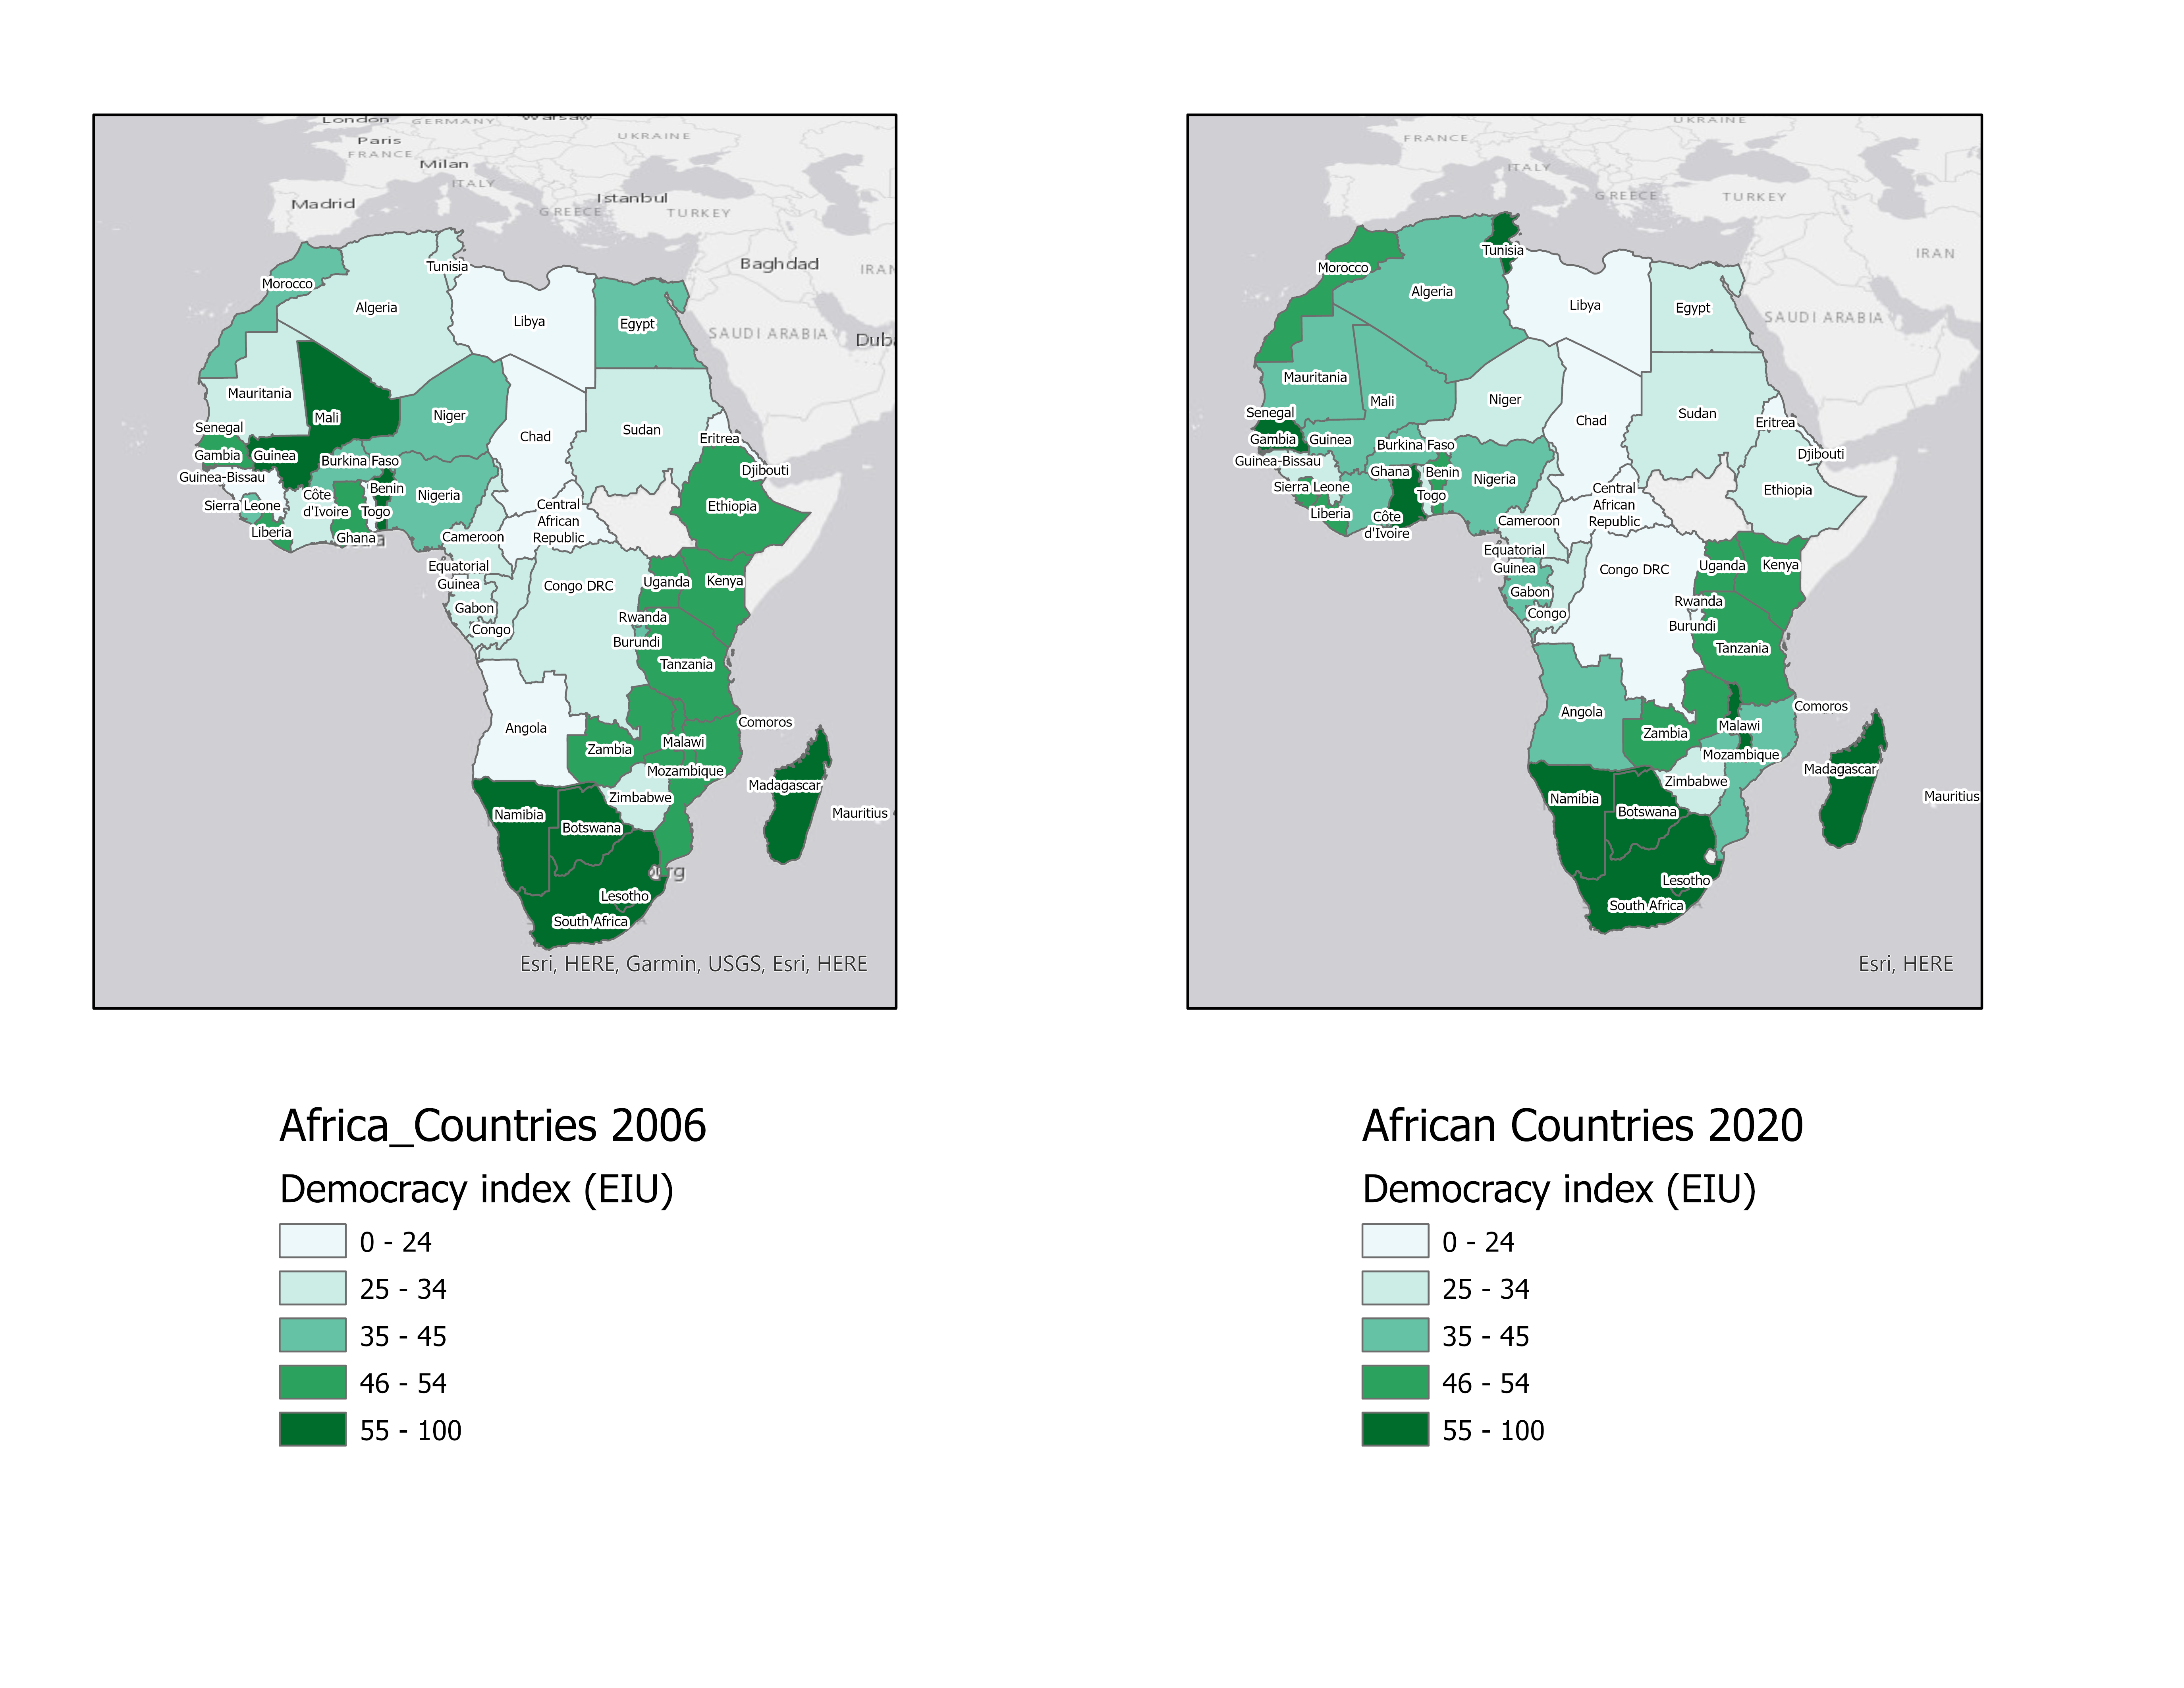

<h2><center>4.3: Why Africa’s island-states are generally freer | <em>The Economist</em></center></h2>
<center>Geography matters!</center>

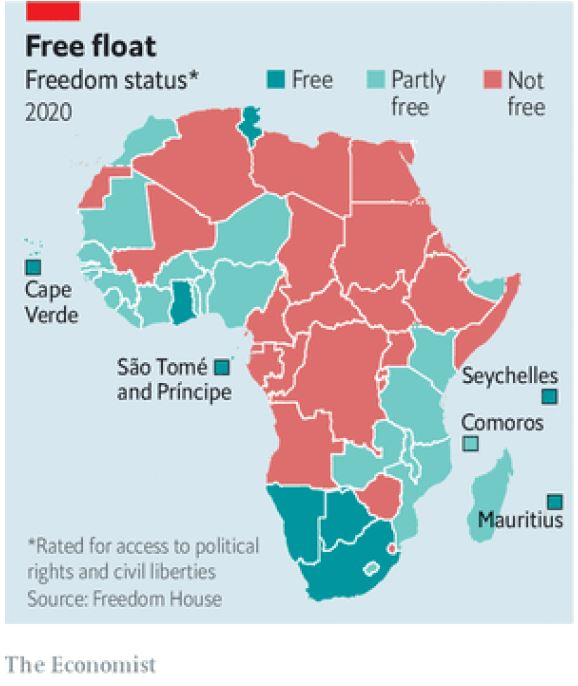